<div class='alert alert-success'>
    <h1 align="center">Search Algorithms: N-Puzzle Problem Formulation</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import math
import matplotlib.pyplot as plt

## Contents
- Search problems
- Problem formulation
- Example: N-Puzzle Problem

### Search problems
Given a **state space graph**, the goal is to search for a path from the start state to the goal state.


#### State space graph (Romania)
<img src='imgs/Romania.png' width='80%'>


#### State space graph (Vaccum world)
<img src='imgs/vaccum_world.png' width='80%'>

## 8-puzzle Problem

<img src='imgs/eight_puzzle_start_goal_actions.png' width='70%'>
<h6 align='center'>8-puzzle Problem (figure from <a href='http://ai.berkeley.edu/home.html'> AI Berekley</a>)</h6>

The 8-puzzle is a sliding puzzle that consists of a frame of numbered square tiles from 1 to 8 in random order with one tile missing. The object of the puzzle is to place the tiles in order by making sliding moves that use the empty space.

Note that this puzzle also exists in other sizes, for example 3-puzzle (2x2), 15-puzzle (4x4), 24-puzzle (5x5), etc. 

## Problem formulation
To solve any problem using search algorithms, first we need to specify exactly what are the possible **states** and **actions** and how they are represented in a computer. This is called **problem formulation**.

### State Space Graph

In fact, when we specify states and possible actions in each state, we are specifying a graph which is called **State Space Graph**. 

In this graph:
 - each node represents a unique **state** of the problem, and
 - each edge represents a possible **action** which results into a new state.
 - also, one special node is specified as **start state**, and
 - one or more nodes are specified as **goal states**.
 
#### States

Here in our implementation, we represent any possible state by a list of numbers from 0 to N (0 represents the blank tile).

**Example:** 
```python
[0, 1, 2, 3, 4, 5, 6, 7, 8]
```

represents:
<img src='imgs/sample_state.png' width='15%'>

#### Actions

Here for simplicity, we define the four possible actions (left, up, right, down) for the blank square. So, "left" means that the blank square goes left, "up" means that the blank square goes up, etc.

| Action    | Description                |
|:---------:|:---------------------------|
| **LEFT**  |the blank square goes left  |
| **UP**    |the blank square goes up    |
| **RIGHT** |the blank square goes right |
| **DOWN**  |the blank square goes down  |

#### Solution

> solving a problem means finding a sequence of actions from start state to a goal state in the state space graph. This is called **solution path** and is the output of the search algorithm. Later, you see other types of search algorithms that return a single state instead of a path.

**Example**:
<img src='imgs/sample_solution_path.png' width='90%'>

### Implementing N-puzzle states
Any state for a search problem should have the following methods:
- `successors()`: which returns a list of successor states for this state. a successor state is an state that can be reached by applying a single action on the current state.
- `is_goal(goal_state)`: which determines if the state is equal to the goal state (or one of the goal states). This is required during the search for a solution path. As you will see, the search process terminates when we find a goal state. We will implement this functionality by implementing the `__eq__()` method for the state class.

other methods:
- `__repr__()`: Always you have to implement this method for any class you define in python. It shows an *official* string representation for the object. This is invoked when you simply write object's name on interactive python console and press enter.
- `__str__()`: this is used in python when you try to print an object. In fact, when you use `print(o)`, python first executes the `__str__()` method to compute a string representation for object `o` and then prints that string. The aim is to provide a nice human readable string representation for the object.
- `__hash__()`: We need to implement this method to make the state **hashable**. States in a search problem must be hashable since during the search process, we need to put them in a `set()` object or a `dict()` object (to prevent expanding a node/state more than once). This is required for **Graph Search**. 

In [2]:
class NPuzzleState:
    
    def __init__(self, N=8, tiles=None):
        if tiles is None:
            self.tiles = tuple(range(N + 1))  # [0, 1, 2, ..., N] and 0 is blank
        else:
            N = len(tiles) - 1
            self.tiles = tuple(tiles[:])
        
        self.N = N
        self.grid_size = int(math.sqrt(N + 1))  # for 8-puzzle, this is 3x3
            
    def successors(self):
        ''' Returns a list of possible actions, their costs and their resulting states.
        '''
        
        blank_idx = self.tiles.index(0)
        successors = []
        
        # left
        if blank_idx % self.grid_size > 0:
            tiles = list(self.tiles)
            tiles[blank_idx], tiles[blank_idx - 1] = tiles[blank_idx - 1], tiles[blank_idx]
            successor = NPuzzleState(tiles=tiles)
            successors.append((successor, 'Left', 1))
        
        # up
        if blank_idx >= self.grid_size:
            tiles = list(self.tiles)
            tiles[blank_idx], tiles[blank_idx - self.grid_size] = tiles[blank_idx - self.grid_size], tiles[blank_idx]
            successor = NPuzzleState(tiles=tiles)
            successors.append((successor, 'Up', 1))
        
        # right
        if blank_idx % self.grid_size < self.grid_size - 1:
            tiles = list(self.tiles)
            tiles[blank_idx], tiles[blank_idx + 1] = tiles[blank_idx + 1], tiles[blank_idx]
            successor = NPuzzleState(tiles=tiles)
            successors.append((successor, 'Right', 1))
            
        # down
        if blank_idx + self.grid_size < len(self.tiles):
            tiles = list(self.tiles)
            tiles[blank_idx], tiles[blank_idx + self.grid_size] = tiles[blank_idx + self.grid_size], tiles[blank_idx]
            successor = NPuzzleState(tiles=tiles)
            successors.append((successor, 'Down', 1))
        
        return successors
    
    def is_goal(self, goal_state):
        return self == goal_state
    
    def plot(self, ax=None, title=None, fs=20):
        if ax is None:
            _, ax = plt.subplots(1)
            
        gs = self.grid_size
        
        # draw border
        border = plt.Rectangle((0, 0), gs, gs, ec='k', fc='w', lw=3)
        ax.add_patch(border)
        
        # draw tiles
        for i, tile in enumerate(self.tiles):
            if tile == 0: continue
            col = self.grid_size - 1 - i // self.grid_size
            row = i %  self.grid_size
            cell = plt.Rectangle((row, col), 1, 1, fc='darkslateblue', ec='k', lw=3, alpha=0.4)
            ax.add_patch(cell)
            tileSq = plt.Rectangle((row + 0.15, col + 0.15), 0.7, 0.7, fc='darkslateblue', ec='k', lw=1, alpha=0.8)
            ax.add_patch(tileSq)
            ax.text(row + 0.5, col + 0.5, f"{tile}", color='w', fontsize=fs, va='center', ha='center')
        
        ax.axis('square')
        ax.axis('off')
        if title:
            ax.set_title(title, fontsize=fs)
            
    def __hash__(self):
        return hash(self.tiles)
    
    def __eq__(self, other):
        if self is other: return True  # True object equallity test for efficiency
        if other is None: return False
        if not isinstance(other, NPuzzleState): return False
        
        return self.tiles == other.tiles
    
    def __str__(self):
        """ An string representation of the tiles configuration in 2d format.
        """
        result = ''
        for i in range(len(self.tiles)):
            result += f' {self.tiles[i]:2d} ' if self.tiles[i] != 0 else '    '
            if i % self.grid_size == self.grid_size - 1 and i < self.N:
                result += '\n'
        return result
    
    def __repr__(self):
        return f'NPuzzleState(N={self.N}, tiles={self.tiles})'

For example, here we have defined the start state and the goal state and we need to find a sequence of actions (left, up, right, down) from the start state to the goal state.

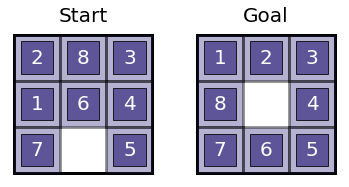

In [3]:
start_state_tiles = [
    2, 8, 3, 
    1, 6, 4, 
    7, 0, 5]

goal_state_tiles = [
    1, 2, 3, 
    8, 0, 4,
    7, 6, 5]

# define start state and goal state
start_state = NPuzzleState(tiles=start_state_tiles)
goal_state = NPuzzleState(tiles=goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start')
goal_state.plot(axes[1], 'Goal')
plt.show()

In [4]:
print(start_state)

  2   8   3 
  1   6   4 
  7       5 


In [5]:
start_state

NPuzzleState(N=8, tiles=(2, 8, 3, 1, 6, 4, 7, 0, 5))

In [6]:
eval(repr(start_state))

NPuzzleState(N=8, tiles=(2, 8, 3, 1, 6, 4, 7, 0, 5))

### Successor function

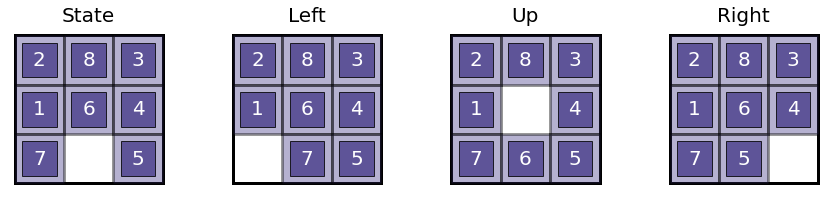

In [7]:
successors = start_state.successors()
fig, axes = plt.subplots(1, 1 + len(successors), figsize=(15, 3))

# plot start state
start_state.plot(axes[0], 'State')

# plot successors of the start state
for i, (state, action, step_cost) in enumerate(successors):
    state.plot(axes[i+1], action)

## What is next?
- Now that we have problem formulation for the N-Puzzle problem, it's time to implement different search strategies to solve this problem.
- In the next lesson, we will implement uninformed search strategies including, 
    - Breadth-First Search (BFS), 
    - uniform cost search (UCS),
    - Depth-First Search (DFS),
    - Depth Limitted Search (DLS),
    - Iterative Deepening Search (IDS)